In [5]:
# dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_

# path to sqlite db
database_path = 'Resources/hawaii.sqlite'

In [6]:
# create an engine to communicate with db
engine = create_engine(f'sqlite:///{database_path}')

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# We can view all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [11]:
# use Inspector to print column names and types
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'],column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [54]:
# Design a query to retrieve the last 12 months of precipitation data 
# and plot the results
# Calculate the date 1 year ago from the last data point in the database
# query last date & convert to string
last_date = str(session.query(Measurement.date).order_by(Measurement.date.desc()).first())
#year = last_date.strftime('%Y')

sliced_date = last_date[2:12]
print(sliced_date)

# extra year, month, day, from string and convert to int
year = int(sliced_date[0:4])
month = int(sliced_date[5:7])
day = int(sliced_date[8:10])
print(year)
print(month)
print(day)

2017-08-23
2017
8
23


In [55]:
# query date that was a year ago from last date
one_year_ago = dt.date(year,month,day) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores
# query all dates from one year ago
sel = [Measurement.date,
      Measurement.prcp]
last_one_year = session.query(*sel).\
    filter(func.strftime(Measurement.date)>= one_year_ago).\
    order_by(Measurement.date).all()
pd.DataFrame(last_one_year)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df = pd.DataFrame(last_one_year, columns=['Date','Precipitation'])
prcp_df.set_index('Date',inplace=True)
prcp_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


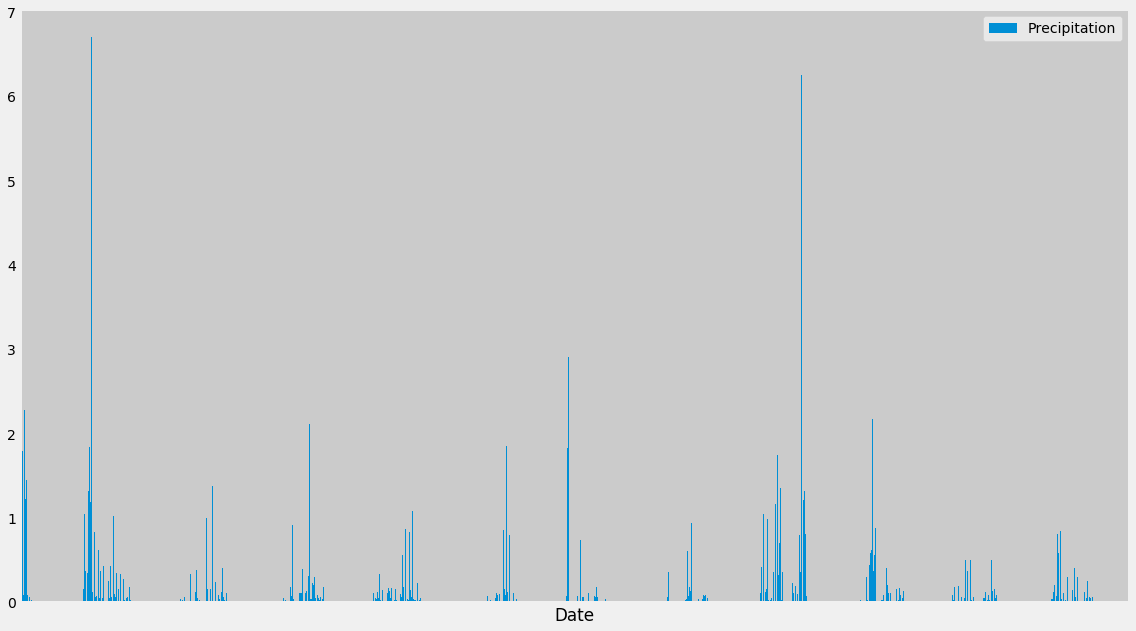

In [103]:
# Use Pandas Plotting with Matplotlib to plot the data
# plot precipitation result
prcp_df.plot.bar(figsize=(16,9))
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)
plt.tight_layout()
plt.show()

In [80]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_total = prcp_df['Precipitation'].count()
prcp_mean = prcp_df['Precipitation'].mean()
prcp_std = prcp_df['Precipitation'].std()
prcp_min = prcp_df['Precipitation'].min()
prcp_max = prcp_df['Precipitation'].max()
prcp_25 = prcp_df['Precipitation'].quantile(.25)
prcp_50 = prcp_df['Precipitation'].quantile(.50)
prcp_75 = prcp_df['Precipitation'].quantile(.75)

# create summary list
prcp_summary_list = [['count',prcp_total],
                       ['mean',prcp_mean],
                       ['std',prcp_std],
                       ['min',prcp_min],
                       ['25%',prcp_25],
                       ['50%',prcp_50],
                       ['75%',prcp_75],
                       ['max',prcp_max]]

In [81]:
prcp_summary_df = pd.DataFrame(prcp_summary_list, columns=['','Precipitation']).set_index('')
prcp_summary_df

,Precipitation
,
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [82]:
# shortcut method for prcp_df summary
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [83]:
# Design a query to calculate the total number of stations.
# use Inspector to print column names and types
inspector = inspect(engine)
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column['name'],column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [84]:
num_of_station = session.query(Station.station).count()
print(num_of_station)

9


In [85]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# station_sel = [Station.station]
active_station = (session.query(Measurement.station, func.count(Measurement.station))\
     .group_by(Measurement.station).order_by(func.count(Measurement.station).desc())\
    ).all()

active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [86]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
low_high_avg = session.query(*sel).filter(Measurement.station=='USC00519281').all()
low_high_avg

[(54.0, 85.0, 71.66378066378067)]

In [87]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date]
act_stn_dates = session.query(*sel).filter(Measurement.station=='USC00519281').all()
act_stn_dates

[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-05'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-11'),
 ('2010-01-12'),
 ('2010-01-13'),
 ('2010-01-14'),
 ('2010-01-15'),
 ('2010-01-16'),
 ('2010-01-17'),
 ('2010-01-18'),
 ('2010-01-19'),
 ('2010-01-20'),
 ('2010-01-21'),
 ('2010-01-22'),
 ('2010-01-23'),
 ('2010-01-24'),
 ('2010-01-25'),
 ('2010-01-26'),
 ('2010-01-27'),
 ('2010-01-28'),
 ('2010-01-29'),
 ('2010-01-30'),
 ('2010-01-31'),
 ('2010-02-01'),
 ('2010-02-02'),
 ('2010-02-03'),
 ('2010-02-04'),
 ('2010-02-05'),
 ('2010-02-06'),
 ('2010-02-07'),
 ('2010-02-08'),
 ('2010-02-09'),
 ('2010-02-10'),
 ('2010-02-11'),
 ('2010-02-12'),
 ('2010-02-13'),
 ('2010-02-14'),
 ('2010-02-15'),
 ('2010-02-16'),
 ('2010-02-17'),
 ('2010-02-18'),
 ('2010-02-19'),
 ('2010-02-20'),
 ('2010-02-21'),
 ('2010-02-22'),
 ('2010-02-23'),
 ('2010-02-24'),
 ('2010-02-25'),
 ('2010-02-26'),
 ('2010-02-27'),
 ('2010-02-28'

In [88]:
act_stn_last_date = session.query(*sel).order_by(Measurement.date.desc()).filter(Measurement.station=='USC00519281').first()
act_stn_last_date

('2017-08-18')

In [89]:
act_stn_last_one_yr_ago = dt.date(2017,8,18) - dt.timedelta(days=365)
print(act_stn_last_one_yr_ago)

2016-08-18


In [90]:
sel_date_temp = [Measurement.date,Measurement.tobs]
last_twlve_mo = session.query(*sel_date_temp).filter(and_(Measurement.date>=act_stn_last_one_yr_ago, Measurement.station=='USC00519281')).all()
last_twlve_mo

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [92]:
last_twlve_mo_df = pd.DataFrame(last_twlve_mo)
last_twlve_mo_df

,date,tobs
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0
...,...,...
352,2017-08-14,77.0
353,2017-08-15,77.0
354,2017-08-16,76.0
355,2017-08-17,76.0


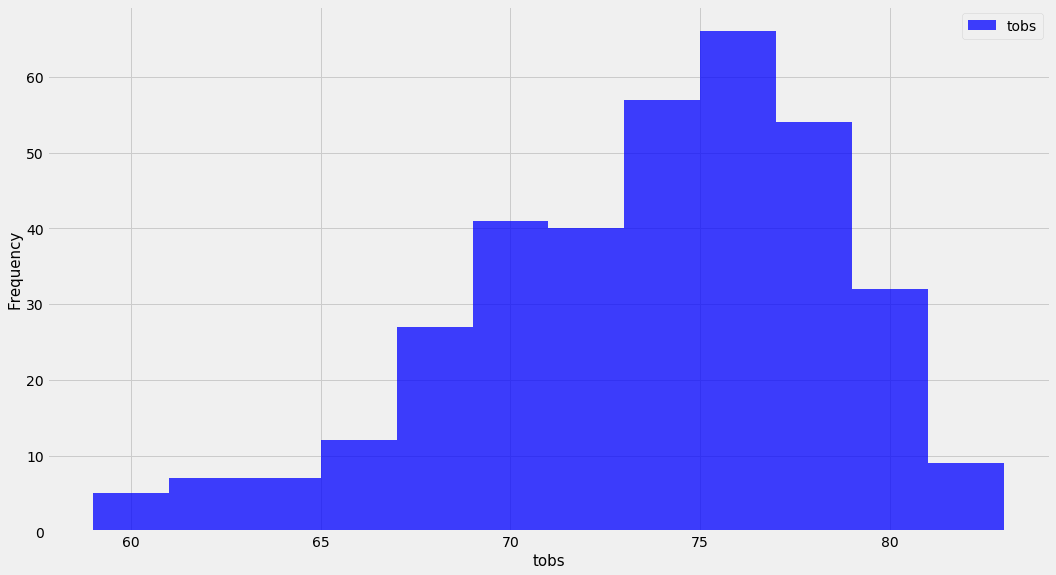

In [108]:
x_axis = last_twlve_mo_df['tobs']
plt.figure(figsize=[16,9])
n,bins,patches=plt.hist(x=x_axis,bins=12,color='blue',alpha=0.75,label='tobs')
plt.grid(True)
plt.xlabel('tobs',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.legend()
plt.show()